Surface 1:
Number of vertices: 2562
Number of faces: 5120
Surface 2:
Number of vertices: 2562
Number of faces: 5120
Surface 3:
Number of vertices: 2562
Number of faces: 5120


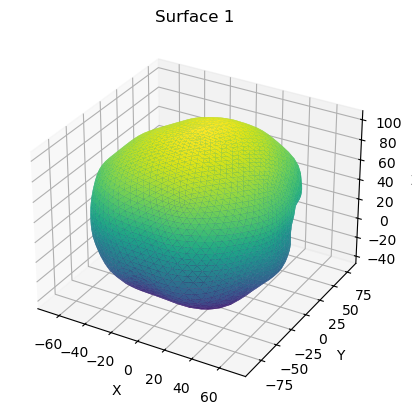

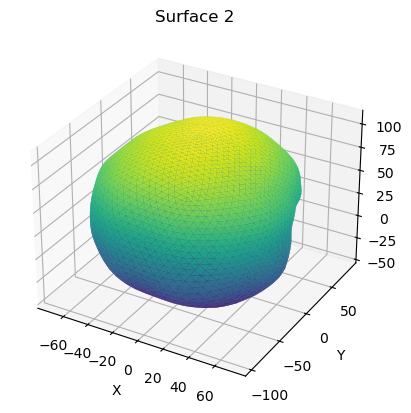

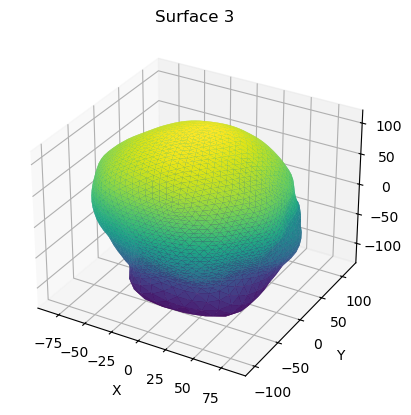

In [35]:
import os
import mne

# Path to the MNE sample dataset
sample_data_path = mne.datasets.sample.data_path()

# Path to the BEM folder containing .surf files
bem_folder = os.path.join(sample_data_path, 'subjects', 'sample', 'bem')

# Load the surface data
surf_files = ['inner_skull.surf', 'outer_skull.surf', 'outer_skin.surf']  # Adjust filenames as needed

vertices_list = []
faces_list = []
for surf_file in surf_files:
    surf_path = os.path.join(bem_folder, surf_file)
    vertices, faces = mne.read_surface(surf_path)
    vertices_list.append(vertices)
    faces_list.append(faces)

# Print the number of vertices and faces loaded for each surface
for i, (vertices, faces) in enumerate(zip(vertices_list, faces_list)):
    print(f"Surface {i+1}:")
    print("Number of vertices:", len(vertices))
    print("Number of faces:", len(faces))

# Optionally, you can visualize the loaded surfaces
# Here's a basic example using Matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

for i, (vertices, faces) in enumerate(zip(vertices_list, faces_list)):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_trisurf(vertices[:, 0], vertices[:, 1], vertices[:, 2], triangles=faces, cmap='viridis')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.title(f'Surface {i+1}')
    plt.show()


In [3]:
import numpy as np
import mne

# Set the path to your local MNE data folder
data_path = 'C:/Users/krina/mne_data'

# Load the sample data
raw = mne.io.read_raw_fif(data_path + '/MNE-sample-data/MEG/sample/sample_audvis_raw.fif', preload=True)
events = mne.read_events(data_path + '/MNE-sample-data/MEG/sample/sample_audvis_raw-eve.fif')

# Set up some example epochs
event_id = {'auditory/left': 1}
tmin, tmax = -0.2, 0.5
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, proj=True,
                    baseline=(None, 0), preload=True,
                    reject=dict(eeg=80e-6, eog=150e-6))

# Apply source localization (e.g., dSPM method)
inverse_operator = mne.minimum_norm.read_inverse_operator(data_path + '/MNE-sample-data/MEG/sample/sample_audvis-meg-oct-6-meg-inv.fif')
stc = mne.minimum_norm.apply_inverse_epochs(epochs, inverse_operator, lambda2=1.0 / 9.0, pick_ori=None)

# Generate a 3D surface representation of the source estimates
# Replace 'fsaverage' with the appropriate subject name if you're working with subject-specific data
# You can choose different methods for creating the surface such as 'ico', 'oct', or 'vol'
surfaces = mne.read_source_spaces(data_path + '/MNE-sample-data/subjects/fsaverage/bem/fsaverage-ico-5-src.fif')

surface = surfaces[0]  # Selecting the first surface from the list

# Save each SourceEstimate in stc as a separate .obj file
for i, stc_single in enumerate(stc):
    # Extract vertices and source estimates
    vertices = surface['rr']
    data = stc_single.data

    # Save vertices and data to an .obj file
    with open(f'visualization_{i}.obj', 'w') as f:
        for vertex in vertices:
            f.write('v {} {} {}\n'.format(*vertex))
        for d in data:
            for val in d:
                f.write('val {}\n'.format(val))


Opening raw data file C:/Users/krina/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Reading 0 ... 166799  =      0.000 ...   277.714 secs...
Not setting metadata
72 matching events found
Setting baseline interval to [-0.19979521315838786, 0.0] s
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 3)
3 projection items activated
Using data from preloaded Raw for 72 events and 421 original time points ...
    Rejecting  epoch based on EEG : ['EEG 001', 'EEG 002', 'EEG 003', 'EEG 004', 'EEG 005', 'EEG 006', 'EEG 007', 'EEG 008', 'EEG 009', 'EEG 010', 'EEG 011', 'EEG 012', 'EEG 013', 'EEG 014', 'EEG 015', 'EEG 016', 'EEG 017', 'EEG 018', 'EEG 019', 'EEG 020', 'EEG 021', 'EEG 022', 'EEG 023', 'EEG 024', 'EEG 026', 'EEG 027', 'EEG 028', 'EEG 029

In [4]:
import numpy as np
import mne

# Set the path to your local MNE data folder
data_path = 'C:/Users/krina/mne_data'

# Load the sample data
raw = mne.io.read_raw_fif(data_path + '/MNE-sample-data/MEG/sample/sample_audvis_raw.fif', preload=True)
events = mne.read_events(data_path + '/MNE-sample-data/MEG/sample/sample_audvis_raw-eve.fif')

# Set up some example epochs
event_id = {'auditory/left': 1}
tmin, tmax = -0.2, 0.5
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, proj=True,
                    baseline=(None, 0), preload=True,
                    reject=dict(eeg=80e-6, eog=150e-6))

# Apply source localization (e.g., dSPM method)
inverse_operator = mne.minimum_norm.read_inverse_operator(data_path + '/MNE-sample-data/MEG/sample/sample_audvis-meg-oct-6-meg-inv.fif')
stc = mne.minimum_norm.apply_inverse_epochs(epochs, inverse_operator, lambda2=1.0 / 9.0, pick_ori=None)

# Average the source estimates across epochs
stc_avg = np.mean([s.data for s in stc], axis=0)

# Generate a 3D surface representation of the source estimates
# Replace 'fsaverage' with the appropriate subject name if you're working with subject-specific data
# You can choose different methods for creating the surface such as 'ico', 'oct', or 'vol'
surfaces = mne.read_source_spaces(data_path + '/MNE-sample-data/subjects/fsaverage/bem/fsaverage-ico-5-src.fif')

surface = surfaces[0]  # Selecting the first surface from the list

# Extract vertices
vertices = surface['rr']

# Save vertices and averaged data to a single .obj file
with open('visual.obj', 'w') as f:
    for vertex in vertices:
        f.write('v {} {} {}\n'.format(*vertex))
    for val in stc_avg:
        f.write('val {}\n'.format(val))


Opening raw data file C:/Users/krina/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Reading 0 ... 166799  =      0.000 ...   277.714 secs...
Not setting metadata
72 matching events found
Setting baseline interval to [-0.19979521315838786, 0.0] s
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 3)
3 projection items activated
Using data from preloaded Raw for 72 events and 421 original time points ...
    Rejecting  epoch based on EEG : ['EEG 001', 'EEG 002', 'EEG 003', 'EEG 004', 'EEG 005', 'EEG 006', 'EEG 007', 'EEG 008', 'EEG 009', 'EEG 010', 'EEG 011', 'EEG 012', 'EEG 013', 'EEG 014', 'EEG 015', 'EEG 016', 'EEG 017', 'EEG 018', 'EEG 019', 'EEG 020', 'EEG 021', 'EEG 022', 'EEG 023', 'EEG 024', 'EEG 026', 'EEG 027', 'EEG 028', 'EEG 029

In [ ]:
import mne

# Replace 'sample' with the subject name from your MNE-Python data
# Replace 'bem' with the path to your BEM folder if different
subject = 'sample'
bem_path = 'C:/Users/krina/mne_data/MNE-sample-data/subjects/sample/bem'

# Load the BEM surfaces
bem = mne.io.read_raw_beam(subject, bem_path, 'inner_skull.surf')

# Access the brain surface mesh data from the BEM object
brain_surf = bem['surfaces'][0]  # Assuming the first surface is the brain

import pickle

# Replace 'model_path' with the path to your model folder
model_path = 'C:/Users/krina/ESI_project 2/model/sample/real_model'
source_file = os.path.join(model_path, 'net_params_best.pkl')  # Assuming filename

# Load the source activity from the pickle file
with open(source_file, 'rb') as f:
  source_activity = pickle.load(f)

import trimesh

# Convert brain surface mesh from MNE-Python format (replace with yours)
brain_mesh = trimesh.load("inner_skull.surf")  # Replace with your format

# Assign vertex colors based on source activity
vertex_colors = [...]  # Implement logic to map activity to colors

# Example color mapping (replace with your approach)
colormap = plt.cm.inferno
vertex_colors = colormap(source_activity)[:, :3]

for i, source in enumerate(source_locations):  # Optional: Use actual locations
  vertex_idx = brain_mesh.find_nearest(source)  # Find nearest vertex
  brain_mesh.visual.vertex_colors[vertex_idx] = vertex_colors[i]

# Save the brain mesh with vertex colors in GLTF format
brain_mesh.export(file_obj="brain_with_sources.gltf")